# Imágenes y labels para el entrenamiento

In [ ]:
from fastai.vision import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
labels_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DiplomadoIA/M1_AplicacionesConVisionArtificial/Proyecto_Amazonia/Datos_Entrenamiento/train_v2.csv')
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
labels_df.groupby('tags').count().reset_index().sort_values('image_name',ascending=False).head(20)

,tags,image_name
369,clear primary,13636
433,partly_cloudy primary,3630
386,cloudy,2089
382,clear primary water,1850
143,agriculture clear primary road,1680
140,agriculture clear primary,1626
422,haze primary,1471
110,agriculture clear cultivation primary,1170
128,agriculture clear habitation primary road,1125
153,agriculture clear primary water,712


In [ ]:
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [ ]:
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)

labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_sl = labels_df[labels_df['primary']==1]
data_sl.shape

(37513, 19)

In [ ]:
data_sl = labels_df[(labels_df['selective_logging']==1) & (labels_df['road']==1) & (labels_df['cultivation']==0)]    # 
data_sl  #.shape

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
166,train_166,clear primary road selective_logging water,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
746,train_746,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
871,train_871,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
997,train_997,artisinal_mine clear primary road selective_lo...,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0
1181,train_1181,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38241,train_38241,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
39096,train_39096,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
39185,train_39185,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
39504,train_39504,clear primary road selective_logging,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img144 = cv2.imread('/content/drive/My Drive/Colab Notebooks/DiplomadoIA/M1_AplicacionesConVisionArtificial/Proyecto_Amazonia/Datos_Entrenamiento/train-jpg/train_3794.jpg',0)


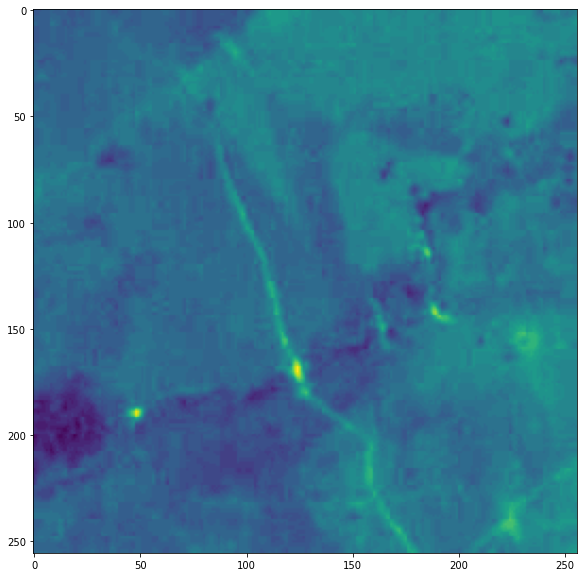

In [ ]:
#img144 = cv2.cvtColor(img144, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow((img144))

In [ ]:
filtro = np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])
filtro

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [ ]:
filtro = np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])
filtro

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [ ]:
img144.shape

(256, 256)

In [ ]:
#Funcion que calcula la convolucion de una imagen con un filtro
# Filtros son siempre de tamaño impar
def convolucion(imagen, filtro):
    #Zero padding
    shift_row = filtro.shape[0]//2
    shift_col = filtro.shape[1]//2
    
    new_image = np.zeros((imagen.shape[0] + 2*shift_row, imagen.shape[1] + 2*shift_col), np.float32)
    new_image[shift_row:imagen.shape[0]+shift_row, shift_col:imagen.shape[1]+shift_col] = imagen
    
    #Imagen resultante
    new_image2 = np.zeros((new_image.shape[0], new_image.shape[1]), np.float32)
    
    #Perform filtering
    for i in range(shift_row, imagen.shape[0]+shift_row):
        for j in range(shift_col, imagen.shape[1]+shift_col):
            aux = new_image[i-shift_row:i+shift_row+1, j-shift_col:j+shift_col+1]
            new_image2[i,j] = np.sum(aux*filtro)
            
    return new_image2[shift_row:imagen.shape[0]+shift_row,shift_col:imagen.shape[1]+shift_col]

In [ ]:
laplacian = convolucion(img144, filtro)
laplacian

array([[-258., -129., -129., -127., ..., -134., -133., -137., -270.],
       [-129.,    0.,    1.,   -2., ...,   -1.,    0.,    3., -136.],
       [-128.,    1.,    2.,   -1., ...,   -1.,    2.,   -1., -134.],
       [-131.,   -1.,   -1.,    0., ...,    3.,    0.,   -2., -136.],
       ...,
       [-131.,    0.,    0.,    0., ...,    2.,   -2.,   -1., -139.],
       [-131.,    0.,    0.,    0., ...,   -2.,    0.,    1., -137.],
       [-131.,    1.,    1.,    1., ...,    0.,    2.,   -2., -140.],
       [-261., -134., -133., -133., ..., -137., -141., -139., -278.]], dtype=float32)

In [ ]:
out = img144 - laplacian
np.clip(out, 0, 255, out = out)

array([[255., 255., 255., 255., ..., 255., 255., 255., 255.],
       [255., 129., 128., 132., ..., 135., 134., 131., 255.],
       [255., 128., 127., 131., ..., 135., 132., 136., 255.],
       [255., 131., 131., 130., ..., 131., 135., 138., 255.],
       ...,
       [255., 131., 131., 131., ..., 135., 140., 139., 255.],
       [255., 131., 131., 131., ..., 140., 138., 137., 255.],
       [255., 130., 130., 130., ..., 138., 136., 141., 255.],
       [255., 255., 255., 255., ..., 255., 255., 255., 255.]], dtype=float32)

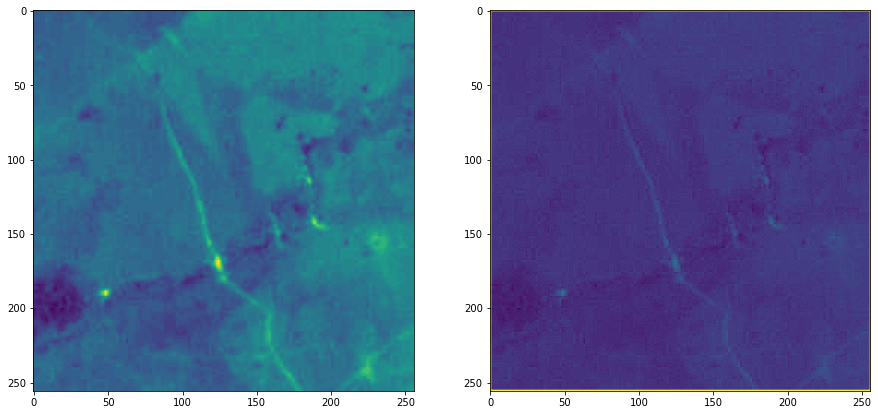

In [ ]:
out = out.astype('uint8')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow((img144))
plt.subplot(1,2,2), plt.imshow(out)
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f70aa0b9978>,
 <matplotlib.image.AxesImage at 0x7f70aa39c940>)

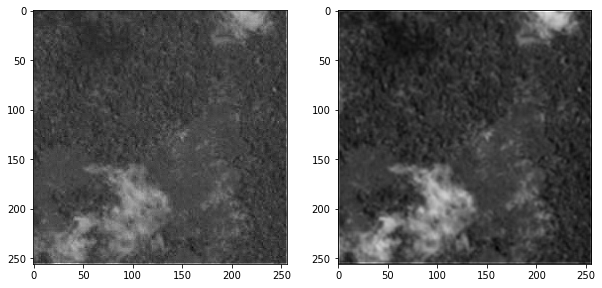

In [ ]:
#tamFiltro = 3
#filtro2 = (1/(tamFiltro**2))*np.ones((tamFiltro,tamFiltro))
#out2 = convolucion(out, filtro2)
#
#plt.figure(figsize=(10,10))
#plt.subplot(1,2,1), plt.imshow(out, cmap='gray')
#plt.subplot(1,2,2), plt.imshow(out2, cmap='gray')
#plt.show()

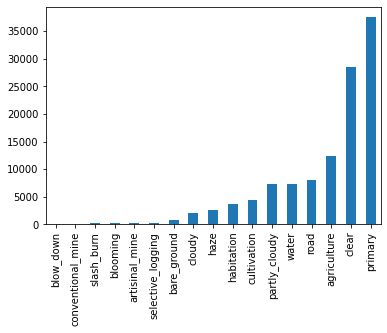

In [ ]:
labels_df[label_list].sum().sort_values().plot.bar()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


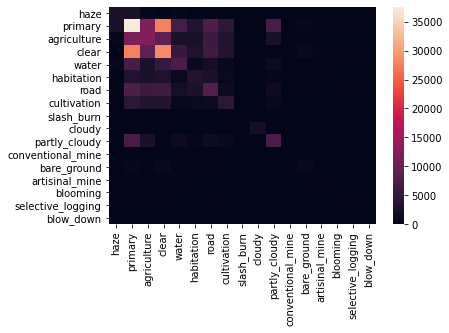

In [ ]:
def make_cooccurence_matrix(labels):
    numeric_df = labels_df[labels]
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix

make_cooccurence_matrix(label_list)

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


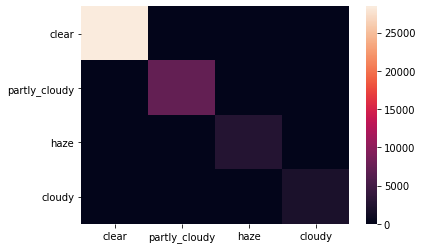

In [ ]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

,primary,agriculture,water,cultivation,habitation,road,bare_ground
primary,37513,11972,7001,4455,3469,7728,683
agriculture,11972,12315,2712,3377,2737,6034,225
water,7001,2712,7411,868,915,2125,206
cultivation,4455,3377,868,4477,895,1294,89
habitation,3469,2737,915,895,3660,2786,163
road,7728,6034,2125,1294,2786,8071,323
bare_ground,683,225,206,89,163,323,862


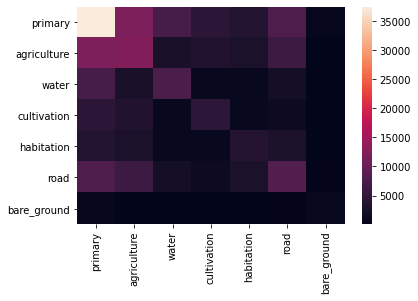

In [ ]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation', 'road', 'bare_ground']
make_cooccurence_matrix(land_labels)

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,862,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


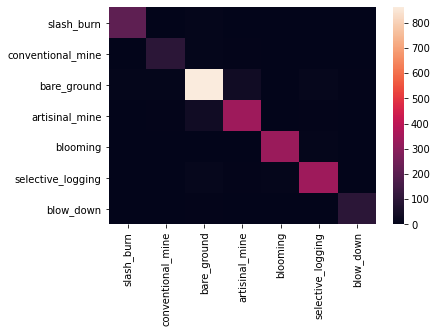

In [ ]:
rare_labels = [label for label in label_list if labels_df[label].sum() < 2000]
make_cooccurence_matrix(rare_labels)

In [ ]:
dataB = (ImageList.from_csv('/content/drive/My Drive/Colab Notebooks/DiplomadoIA/M1_AplicacionesConVisionArtificial/Proyecto_Amazonia/Datos_Entrenamiento/', 
                           'train_v2.csv', folder='train-jpg', suffix='.jpg')
        .split_none()
        .label_from_df(label_delim=' ')).databunch()

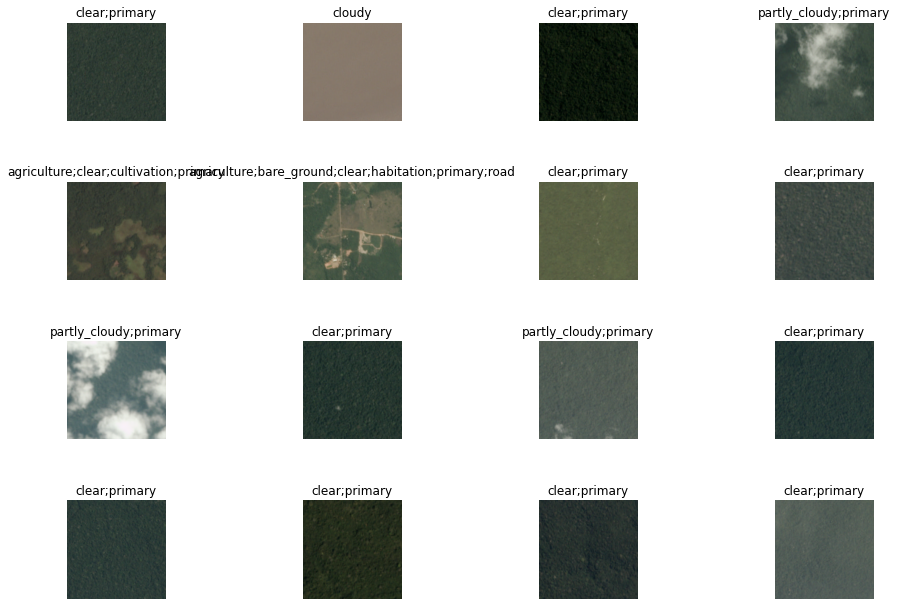

In [ ]:
dataB.show_batch(rows=4, figsize=(12,9))